In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from IPython.display import HTML, Latex, Markdown, Pretty

from windIO.Plant import WTLayout
from fusedwake.WindFarm import WindFarm

from fusedwake.gcl import GCL
import fusedwake.gcl.fortran as fgcl

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#filename = 'middelgrunden.yml'
#filename = 'lillgrund.yml'
filename = 'hornsrev.yml'
#filename = 'test_WF.yml'

#wtl = WTLayout(filename)
wf = WindFarm(yml=filename)

In [3]:
gcl = GCL(WF=wf, TI=0.1, z0=1e-10)

In [4]:
# Inputs
WS=10.0*np.ones([wf.nWT])
WD=270*np.ones([wf.nWT])
TI=0.1*np.ones([wf.nWT])
version = 'fort_gclm_s' # 

# Run the models
gcl(WS=WS, WD=WD, TI=TI, version='fort_gclm_s')

In [5]:
gcl(WS=WS, WD=WD, TI=TI).p_wt.sum()

53223432.296349496

In [6]:
# Inputs
WS=10.0+np.random.normal(loc=0.0, scale=0.25, size=[wf.nWT])#np.ones([wf.nWT])
WD=270+np.random.normal(loc=0.0, scale=5, size=[wf.nWT])#np.ones([wf.nWT])
TI=0.1+np.random.normal(loc=0.0, scale=0.01, size=[wf.nWT])#*np.ones([wf.nWT])
version = 'fort_gclm_s' # 

# Run the models
fort_gclm_s = gcl(WS=WS, WD=WD, TI=TI, version='fort_gclm_s')

In [7]:
fort_gclm_s.p_wt.sum()

70132996.399100527

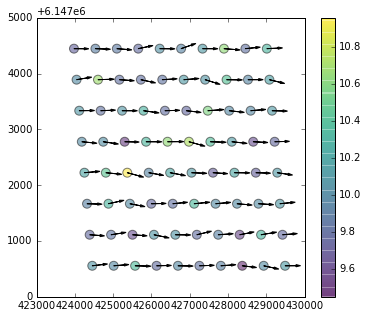

In [8]:
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
plt.scatter(x=wf.xyz[0,:],
           y=wf.xyz[1,:],
           s=2.*np.array(wf.R),
           c=WS,
           alpha=0.5,
           cmap=plt.cm.viridis,
           )
plt.colorbar()
for i in range(wf.nWT):
    #ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i])
    ax.arrow(x=wf.xyz[0,i],
          y=wf.xyz[1,i],
          dx=wf.R[1]*WS[i]*np.cos(np.deg2rad(270-WD[i])),
          dy=wf.R[1]*WS[i]*np.sin(np.deg2rad(270-WD[i])),
          head_length=3*wf.R[1],head_width=wf.R[1],
          length_includes_head=True,
          fc='k',ec='k',
         )

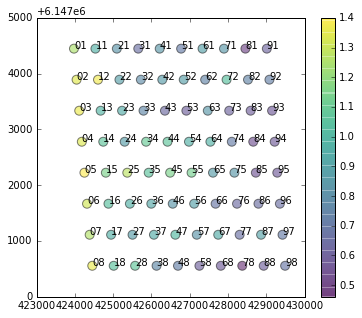

In [9]:
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
plt.scatter(x=wf.xyz[0,:],
            y=wf.xyz[1,:],
            s=2.*np.array(wf.R),
            c=fort_gclm_s.p_wt/1e6,
            alpha=0.5,
            cmap=plt.cm.viridis,
           )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i])

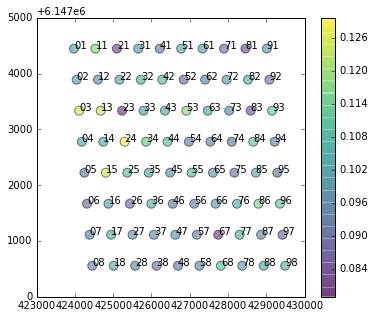

In [10]:
fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot(111)
plt.scatter(x=wf.xyz[0,:],
            y=wf.xyz[1,:],
            s=2.*np.array(wf.R),
            c=TI,
            alpha=0.5,
            cmap=plt.cm.viridis,
           )
plt.colorbar()
for i in range(wf.nWT):
    ax.annotate(str(wf.__getattr__('name')[i][-2:]).zfill(2),wf.xyz[[0,1],i])

In [12]:
WD = np.arange(-50,50)+270
WS = 8.

In [13]:
P_rat_py_v0 = []
P_rat_py_v1 = []
P_rat_fgcl = []
P_rat_fgclm = []
P_rat_fgclm_rdn = []
for wd in WD:
    out = gcl(WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1*np.ones([wf.nWT]), version='py_gcl_v0')
    P_rat_py_v0 = np.append(P_rat_py_v0,out.p_wt[1]/out.p_wt[0])
    
    out = gcl(WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1*np.ones([wf.nWT]), version='py_gcl_v1')
    P_rat_py_v1 = np.append(P_rat_py_v1,out.p_wt[1]/out.p_wt[0])
    
    out = gcl(WS=WS, WD=wd, TI=0.1, version='fort_gcl')
    P_rat_fgcl = np.append(P_rat_fgcl,out.p_wt[1]/out.p_wt[0])
    
    out = gcl(WS=WS*np.ones([wf.nWT]), WD=wd*np.ones([wf.nWT]), TI=0.1**np.ones([wf.nWT]), version='fort_gclm_s')
    P_rat_fgclm = np.append(P_rat_fgclm,out.p_wt[1]/out.p_wt[0])
    
    out = gcl(WS=WS*np.ones([wf.nWT]), WD=wd+np.random.normal(loc=0.0, scale=2, size=[wf.nWT]), 
              TI=0.1**np.ones([wf.nWT]), version='fort_gclm_s')
    P_rat_fgclm_rdn = np.append(P_rat_fgclm_rdn,out.p_wt[1]/out.p_wt[0])

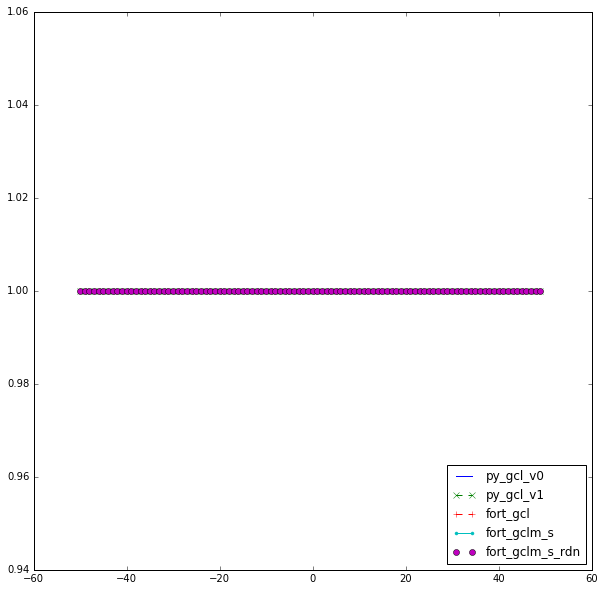

In [14]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)

plt.plot(WD-270,P_rat_py_v0,'-',label ='py_gcl_v0')
#plt.plot(270-WD,P_rat_py_v0,'-',label ='py_gcl_v0_inv')

plt.plot(WD-270,P_rat_py_v1,'x--',label ='py_gcl_v1')
#plt.plot(270-WD,P_rat_py_v1,'x--',label ='py_gcl_v1_inv')

plt.plot(WD-270,P_rat_fgcl,'+--',label ='fort_gcl')
#plt.plot(270-WD,P_rat_fgcl,'+--',label ='fort_gcl')

plt.plot(WD-270,P_rat_fgclm,'.-',label ='fort_gclm_s')
#plt.plot(270-WD,P_rat_fgclm,'.-',label ='fort_gclm_s')

plt.plot(WD-270,P_rat_fgclm_rdn,'o',label ='fort_gclm_s_rdn')

plt.legend(loc=4)